# Data Loading & Cleaning


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Customer Churn.csv")
df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#replacing blanks with 0 as tenure is 0 and no total charges are recorded
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis (EDA)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df["customerID"].duplicated().sum()


0

In [25]:
#converted 0 and 1 values of senior citizen to yes/no
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)        

In [27]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Churn Distribution Analysis

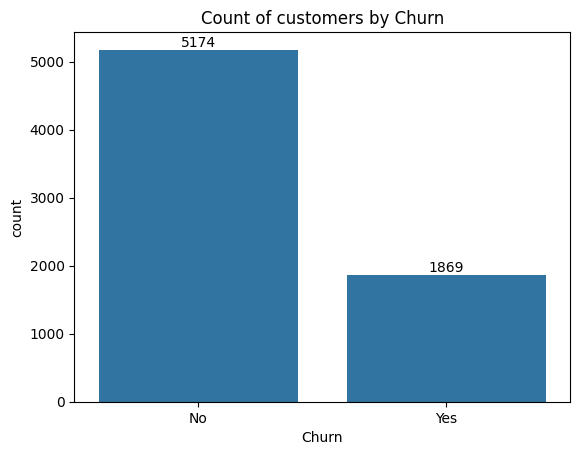

In [39]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0]) 
plt.title("Count of customers by Churn")
plt.show()

In [33]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


# Demographic Analysis

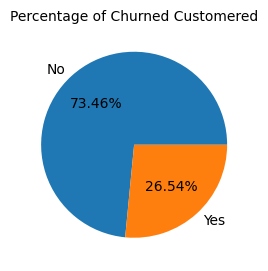

In [42]:
plt.figure(figsize = (3,4))
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customered", fontsize=10)
plt.show()

#from the given chart we can conclude that 26.54% of our custormers have churned out
#now let's explore the reason behind it

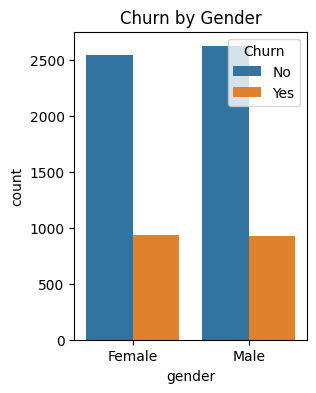

In [47]:
plt.figure(figsize=(3,4))
sns.countplot(x = "gender", data= df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

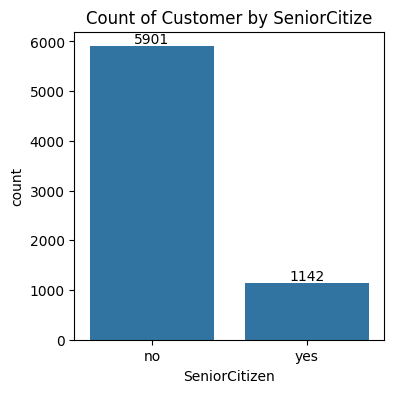

In [54]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "SeniorCitizen", data= df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by SeniorCitize")
plt.show()

# Tenure & Contract Influence

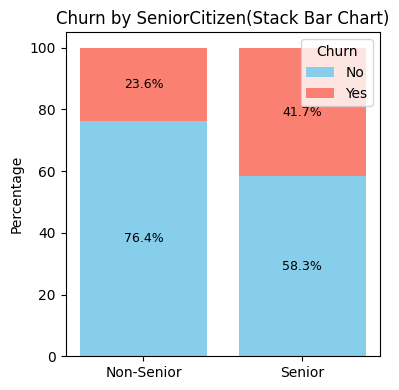

In [55]:
# Step 1: Create a crosstab of SeniorCitizen vs Churn
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Plot stacked bar chart
labels = ['No', 'Yes'] if 'Yes' in df['Churn'].unique() else df['Churn'].unique()
colors = ['skyblue', 'salmon']

fig, ax = plt.subplots(figsize=(4, 4))

bottom = [0] * len(cross_tab)
for i, label in enumerate(labels):
    values = cross_tab[label].values
    bars = ax.bar(cross_tab.index, values, bottom=bottom, label=label, color=colors[i])
    
    # Add % labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f'{height:.1f}%',
                ha='center', va='center', fontsize=9
            )
    
    bottom = [i + j for i, j in zip(bottom, values)]

# Step 3: Add title and legend
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Senior', 'Senior'])
ax.set_ylabel('Percentage')
ax.set_title('Churn by SeniorCitizen(Stack Bar Chart)')
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

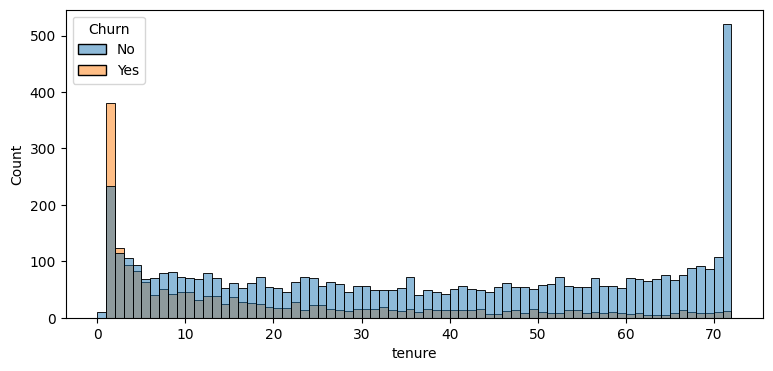

In [61]:
plt.figure(figsize = (9,4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.show()

#people who have used our services for  long time have stayed and people
#who have used our services #1 or 2 more have churned


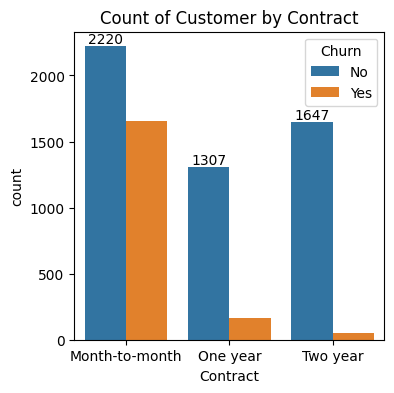

In [63]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Contract", data= df, hue= "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

#people who have month to month are likely to churn then from those 
who have 1 or 2 year or contract

In [64]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Churn by Categorical Features

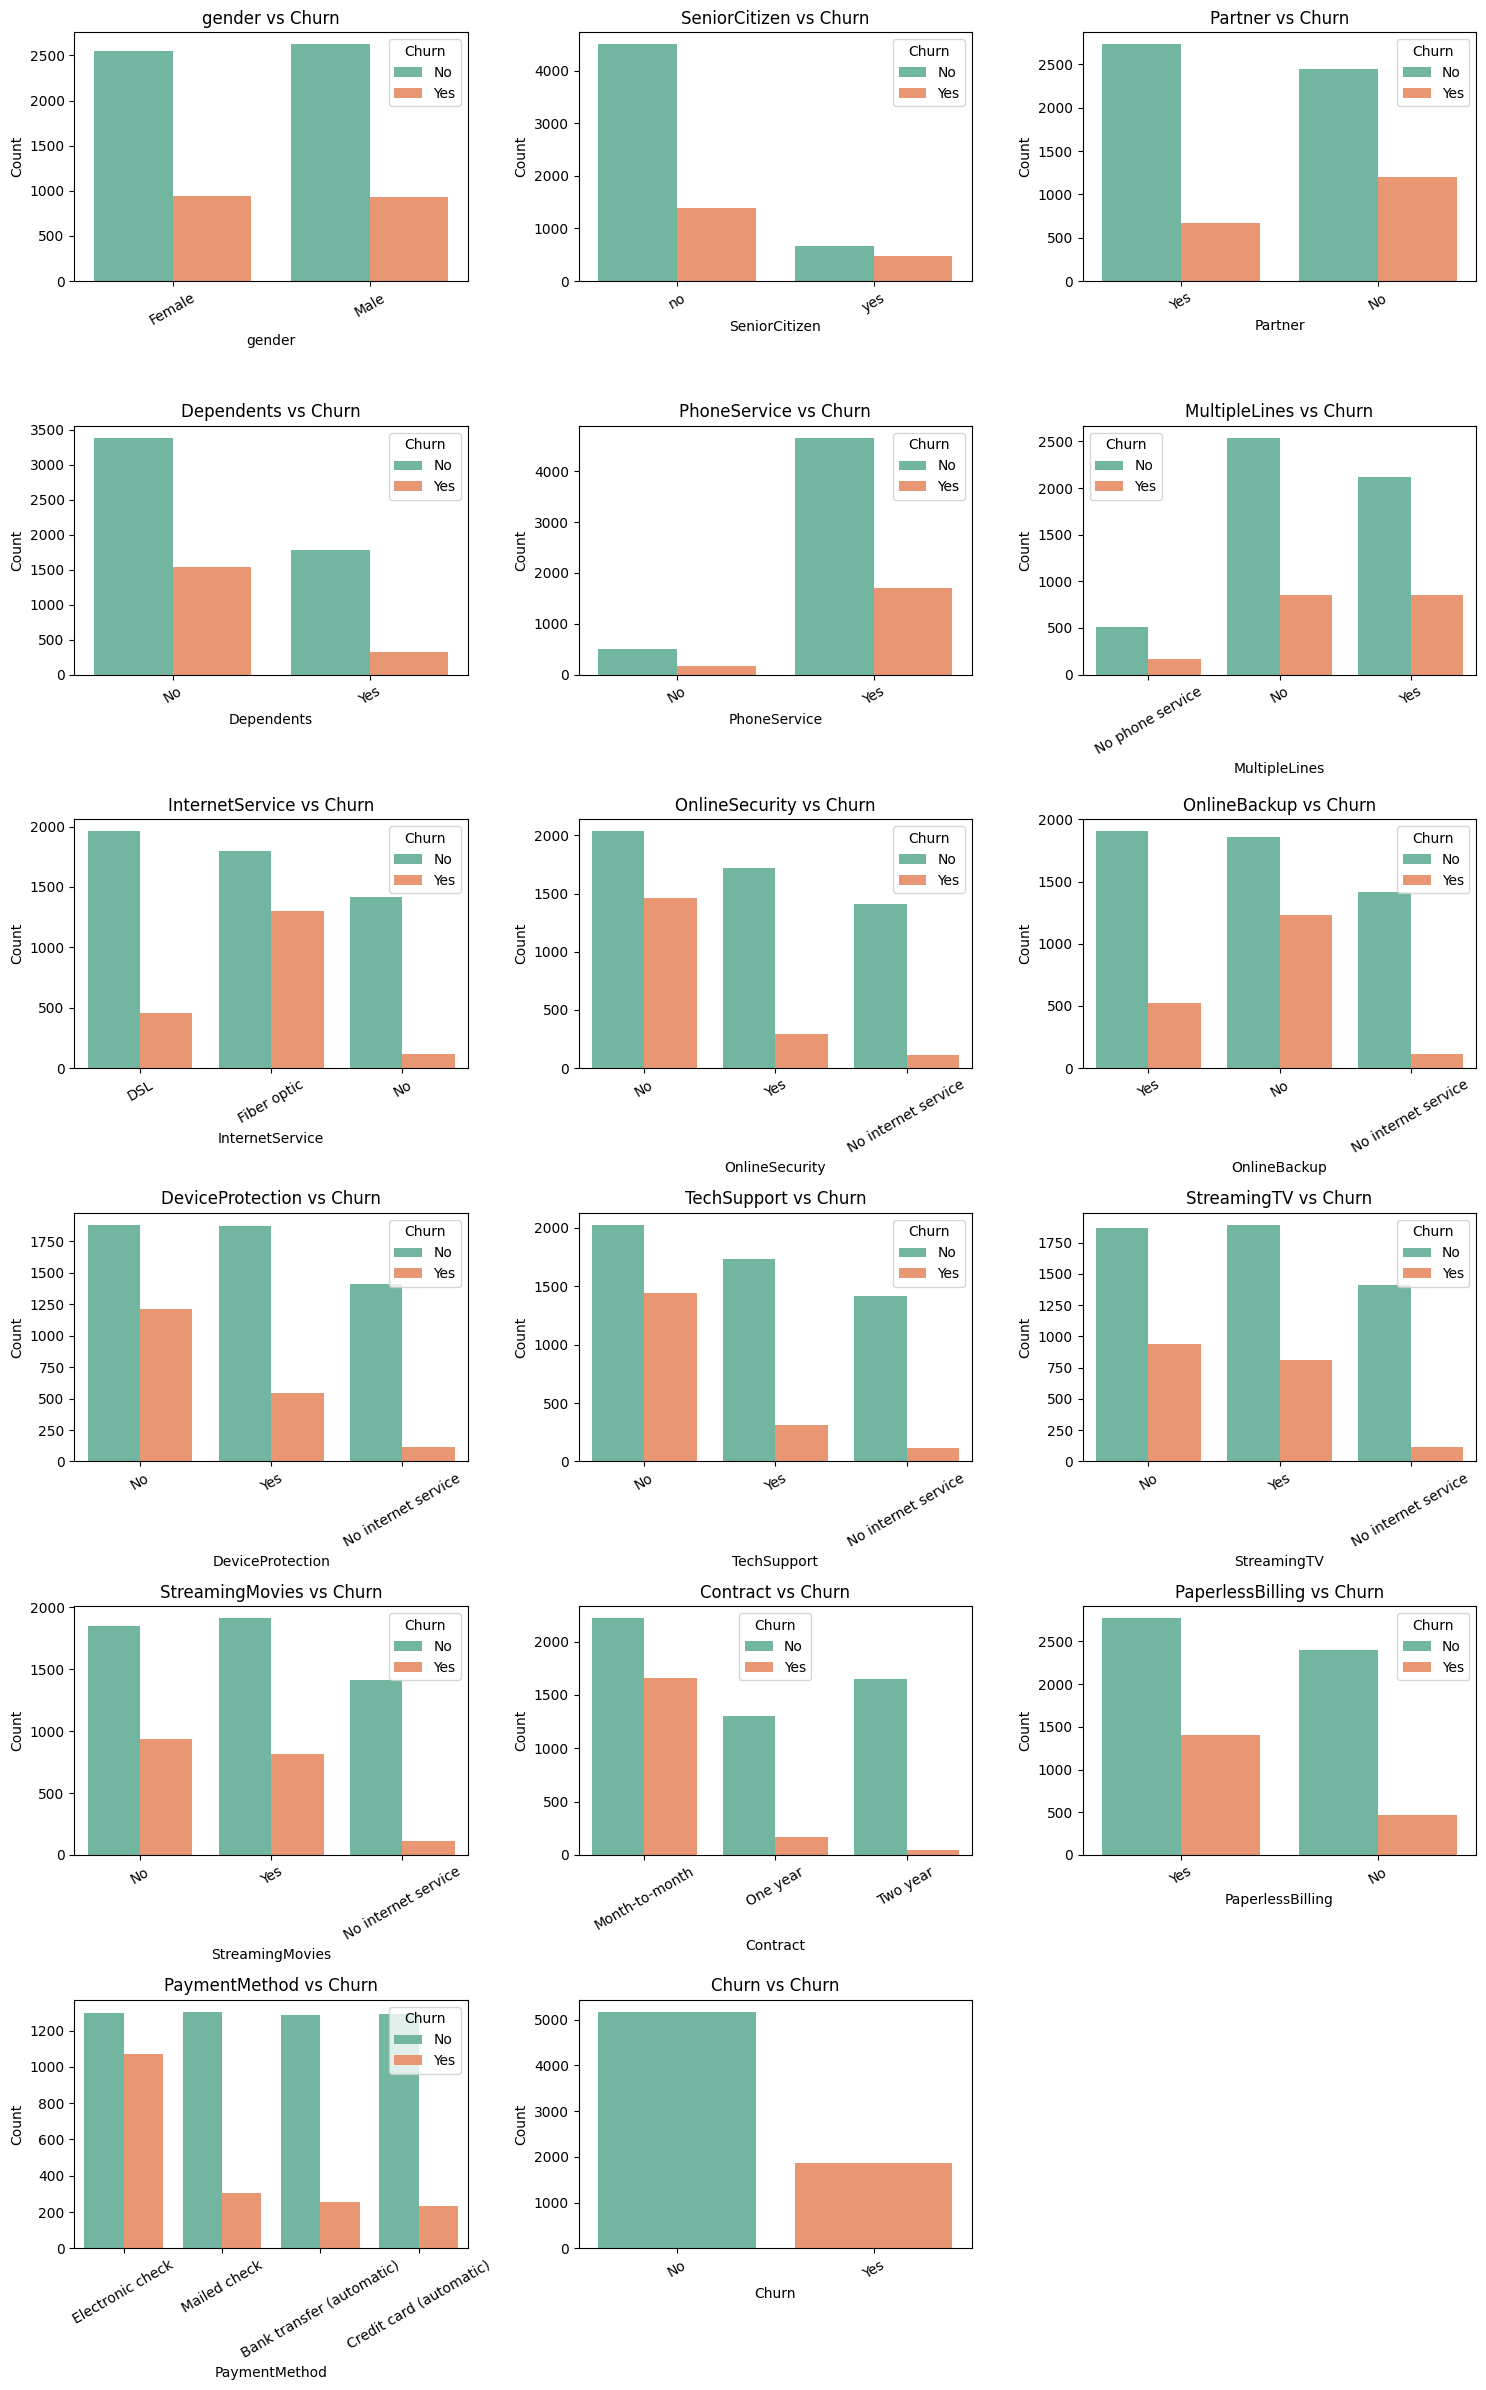

In [65]:
# List of columns you want to plot (excluding numerical and customerID)
columns_to_plot = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Plotting setup
num_cols = 3  # columns in subplot grid
num_rows = -(-len(columns_to_plot) // num_cols)  # ceiling division for rows
plt.figure(figsize=(num_cols * 5, num_rows * 4))  # adjust figure size

# Create subplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=col, data=df, hue="Churn", palette="Set2")
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# Churn by Payment Method


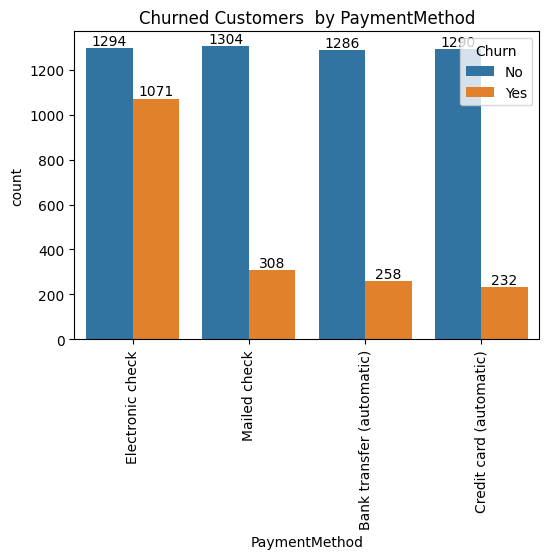

In [69]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "PaymentMethod", data= df, hue= "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 90)
plt.title("Churned Customers  by PaymentMethod")
plt.show()

# Final Project Conclusion
This Churn Analysis project explores customer behavior patterns using the telecom churn dataset. By transforming the data, cleaning inconsistencies, and visualizing churn rates across multiple customer attributes (like contract type, senior citizen status, internet service, etc.), this project provides strong insights into which customer segments are more likely to churn.

These insights can guide business strategies like:

Prioritizing long-term contracts

Offering discounts to high-churn segments

Improving services like tech support or billing methods

